<a href="https://colab.research.google.com/github/hanmisil/HanMisil-Portfolio/blob/main/AI-Study/gan_camel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import path
from google.colab import drive

notebooks_dir_name = 'notebooks'
drive.mount('/content/gdrive')
notebooks_base_dir = path.join('./gdrive/My Drive/', notebooks_dir_name)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/Colab Notebooks/GDL_code-master

/content/gdrive/My Drive/Colab Notebooks/GDL_code-master


In [ ]:
import os
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari

Using TensorFlow backend.


In [ ]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

데이터 불러오기

In [ ]:
(x_train, y_train) = load_safari(DATA_NAME)

In [ ]:
x_train.shape

(80000, 28, 28, 1)

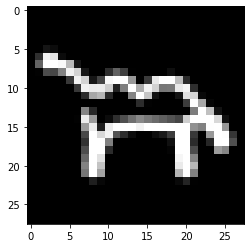

In [ ]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

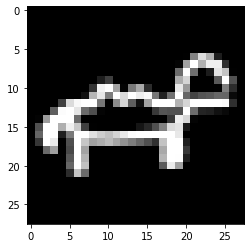

In [ ]:
plt.imshow(x_train[7850,:,:,0], cmap = 'gray')

모델 만들기(1)-

In [ ]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2, 2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [ ]:
gan.discriminator.summary() #판별자

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0   

In [ ]:
gan.generator.summary()   # 생성자

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       2049

모델 훈련

In [ ]:
BATCH_SIZE = 64
EPOCHS = 3000
PRINT_EVERY_N_BATCHES = 5

In [ ]:
import time

start=time.time()

gan.train(
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)
print("걸린시간: ", time.time()-start)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (0.726)(R 0.692, F 0.760)] [D acc: (0.289)(0.578, 0.000)] [G loss: 0.682] [G acc: 1.000]
1 [D loss: (0.720)(R 0.667, F 0.773)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.680] [G acc: 1.000]
2 [D loss: (0.684)(R 0.672, F 0.696)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.643] [G acc: 1.000]
3 [D loss: (0.697)(R 0.627, F 0.768)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.627] [G acc: 1.000]
4 [D loss: (0.706)(R 0.586, F 0.827)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.525] [G acc: 1.000]
5 [D loss: (0.704)(R 0.481, F 0.927)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.539] [G acc: 1.000]
6 [D loss: (0.679)(R 0.471, F 0.887)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.557] [G acc: 1.000]
7 [D loss: (0.687)(R 0.464, F 0.910)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.621] [G acc: 1.000]
8 [D loss: (0.643)(R 0.480, F 0.806)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.613] [G acc: 1.000]
9 [D loss: (1.082)(R 0.411, F 1.753)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.567] [G acc: 1.000]


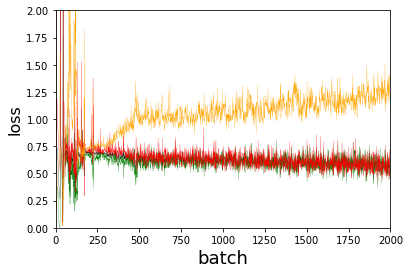

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()

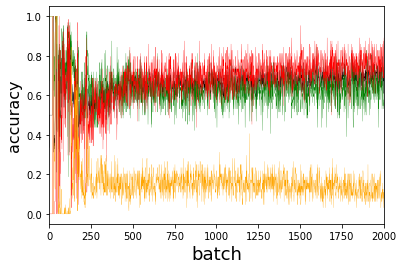

로딩 시간:  0.25135254859924316


In [ ]:
start=time.time()

fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()
print("로딩 시간: ", time.time()-start)

In [ ]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))